In [396]:
#Importando as bibliotecas necessarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [397]:
!pip install xlrd


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [398]:
#carregando arquivo excel
df = pd.read_excel('SINASC_2021.xls')

In [399]:
#verificando os tipos de variaveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      65535 non-null  int64  
 1   CODESTAB    64449 non-null  float64
 2   CODMUNNASC  65535 non-null  int64  
 3   LOCNASC     65535 non-null  int64  
 4   IDADEMAE    65503 non-null  float64
 5   ESTCIVMAE   64188 non-null  float64
 6   ESCMAE      65340 non-null  float64
 7   CODOCUPMAE  61152 non-null  float64
 8   QTDFILVIVO  64867 non-null  float64
 9   QTDFILMORT  64132 non-null  float64
 10  CODMUNRES   65535 non-null  int64  
 11  GESTACAO    64965 non-null  float64
 12  GRAVIDEZ    65520 non-null  float64
 13  PARTO       65525 non-null  float64
 14  CONSULTAS   65535 non-null  int64  
 15  DTNASC      65535 non-null  int64  
 16  HORANASC    65492 non-null  float64
 17  SEXO        65535 non-null  int64  
 18  APGAR1      64146 non-null  float64
 19  APGAR5      64135 non-nul

In [400]:
#Removendo colunas de identificadores unicos, a IDADEPAI é parecido com a IDADEMAE e pode gerar multicolinearidade, será removido também

df = df.drop(columns=[
    "CONTADOR",
    "CODMUNNASC",
    "CODOCUPMAE",
    "CODMUNRES",
    "CODANOMAL",
    "CODESTAB",
    "CODPAISRES",
    "NUMEROLOTE",
    "CODMUNNATU",
    "CODUFNATU",
    "IDADEPAI",
    "QTDFILMORT",
    "GESTACAO",
    "SEMAGESTAC",
    "TPAPRESENT", 
    "RACACORMAE", 
    "VERSAOSIST",
    "DTDECLARAC"
])


In [401]:

# Lista para armazenar os nomes das colunas de data
data_columns = [col for col in df.columns if col.startswith('DT')]

# Função para converter a data
def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d%m%Y')
    except ValueError:
        return pd.NaT

# Aplicar a função de conversão para cada coluna de data
for col in data_columns:
    df[col] = df[col].apply(convert_date)


In [402]:
#verificando todas as colunas 

df.columns

Index(['ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES',
       'DTULTMENST', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK'],
      dtype='object')

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ORIGEM      65535 non-null  int64         
 1   LOCNASC     65535 non-null  int64         
 2   IDADEMAE    65503 non-null  float64       
 3   ESTCIVMAE   64188 non-null  float64       
 4   ESCMAE      65340 non-null  float64       
 5   QTDFILVIVO  64867 non-null  float64       
 6   GRAVIDEZ    65520 non-null  float64       
 7   PARTO       65525 non-null  float64       
 8   CONSULTAS   65535 non-null  int64         
 9   DTNASC      65187 non-null  datetime64[ns]
 10  HORANASC    65492 non-null  float64       
 11  SEXO        65535 non-null  int64         
 12  APGAR1      64146 non-null  float64       
 13  APGAR5      64135 non-null  float64       
 14  RACACOR     63173 non-null  float64       
 15  PESO        65428 non-null  float64       
 16  IDANOMAL    63028 non-

In [404]:
#tratando as datas
# Separando a data completa por dia mes e ano

df['DTNASC_year'] = df['DTNASC'].dt.year
df['DTNASC_month'] = df['DTNASC'].dt.month
df['DTNASC_day'] = df['DTNASC'].dt.day


In [405]:
# Separando a data completa por dia mes e ano

df['DTULTMENST_year'] = df['DTULTMENST'].dt.year
df['DTULTMENST_month'] = df['DTULTMENST'].dt.month
df['DTULTMENST_day'] = df['DTULTMENST'].dt.day
df['DTULTMENST_weekday'] = df['DTULTMENST'].dt.weekday

# Após a extração das informações necessárias, podemos descartar a coluna original 'DTULTMENST'
df.drop(columns='DTULTMENST', inplace=True)


In [406]:
# Separando a data completa por dia mes e ano
df['DTNASCMAE_year'] = df['DTNASCMAE'].dt.year
df['DTNASCMAE_month'] = df['DTNASCMAE'].dt.month
df['DTNASCMAE_day'] = df['DTNASCMAE'].dt.day
df['DTNASCMAE_weekday'] = df['DTNASCMAE'].dt.weekday

# Depois de extrair as informações, podemos descartar a coluna original 'DTNASCMAE'
df.drop(columns='DTNASCMAE', inplace=True)


In [407]:
# Separando a data completa por dia mes e ano

df['DTRECEBIM'] = pd.to_datetime(df['DTRECEBIM'], format='%d%m%Y', errors='coerce')

df['DTRECEBIM_year'] = df['DTRECEBIM'].dt.year
df['DTRECEBIM_month'] = df['DTRECEBIM'].dt.month
df['DTRECEBIM_day'] = df['DTRECEBIM'].dt.day
df['DTRECEBIM_weekday'] = df['DTRECEBIM'].dt.weekday

# Depois de extrair as informações, podemos descartar a coluna original 'DTRECEBIM'
df.drop(columns='DTRECEBIM', inplace=True)


In [408]:
# Converter 'DTCADASTRO' para datetime
df['DTCADASTRO'] = pd.to_datetime(df['DTCADASTRO'])

# Extrair ano, mês e dia
df['ANO_CADASTRO'] = df['DTCADASTRO'].dt.year
df['MES_CADASTRO'] = df['DTCADASTRO'].dt.month
df['DIA_CADASTRO'] = df['DTCADASTRO'].dt.day


In [409]:
# removendo mais colunas antigas pois já criamos novas pra utilizar

df = df.drop(['DTNASC', 'DTCADASTRO'], axis=1)


In [410]:
# verificando colunas vazias por quantidade

df.isnull().sum()


ORIGEM                    0
LOCNASC                   0
IDADEMAE                 32
ESTCIVMAE              1347
ESCMAE                  195
QTDFILVIVO              668
GRAVIDEZ                 15
PARTO                    10
CONSULTAS                 0
HORANASC                 43
SEXO                      0
APGAR1                 1389
APGAR5                 1400
RACACOR                2362
PESO                    107
IDANOMAL               2507
DIFDATA                   0
DTRECORIGA            65535
NATURALMAE              187
ESCMAE2010              199
SERIESCMAE            19680
QTDGESTANT              548
QTDPARTNOR              915
QTDPARTCES             1254
TPMETESTIM              570
CONSPRENAT             3588
MESPRENAT              3547
STTRABPART             1216
STCESPARTO             1034
TPNASCASSI              108
TPFUNCRESP              226
TPDOCRESP                56
ESCMAEAGR1              199
STDNEPIDEM                0
STDNNOVA                  0
TPROBSON            

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ORIGEM              65535 non-null  int64         
 1   LOCNASC             65535 non-null  int64         
 2   IDADEMAE            65503 non-null  float64       
 3   ESTCIVMAE           64188 non-null  float64       
 4   ESCMAE              65340 non-null  float64       
 5   QTDFILVIVO          64867 non-null  float64       
 6   GRAVIDEZ            65520 non-null  float64       
 7   PARTO               65525 non-null  float64       
 8   CONSULTAS           65535 non-null  int64         
 9   HORANASC            65492 non-null  float64       
 10  SEXO                65535 non-null  int64         
 11  APGAR1              64146 non-null  float64       
 12  APGAR5              64135 non-null  float64       
 13  RACACOR             63173 non-null  float64   

In [412]:
#removendo valores ausentes

df = df.dropna(axis=1, how='all')


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGEM              65535 non-null  int64  
 1   LOCNASC             65535 non-null  int64  
 2   IDADEMAE            65503 non-null  float64
 3   ESTCIVMAE           64188 non-null  float64
 4   ESCMAE              65340 non-null  float64
 5   QTDFILVIVO          64867 non-null  float64
 6   GRAVIDEZ            65520 non-null  float64
 7   PARTO               65525 non-null  float64
 8   CONSULTAS           65535 non-null  int64  
 9   HORANASC            65492 non-null  float64
 10  SEXO                65535 non-null  int64  
 11  APGAR1              64146 non-null  float64
 12  APGAR5              64135 non-null  float64
 13  RACACOR             63173 non-null  float64
 14  PESO                65428 non-null  float64
 15  IDANOMAL            63028 non-null  float64
 16  DIFD

In [414]:
# Limite para o número de dados ausentes permitidos na coluna
limite = 34000 

df = df.dropna(thresh=len(df) - limite, axis=1)



In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGEM              65535 non-null  int64  
 1   LOCNASC             65535 non-null  int64  
 2   IDADEMAE            65503 non-null  float64
 3   ESTCIVMAE           64188 non-null  float64
 4   ESCMAE              65340 non-null  float64
 5   QTDFILVIVO          64867 non-null  float64
 6   GRAVIDEZ            65520 non-null  float64
 7   PARTO               65525 non-null  float64
 8   CONSULTAS           65535 non-null  int64  
 9   HORANASC            65492 non-null  float64
 10  SEXO                65535 non-null  int64  
 11  APGAR1              64146 non-null  float64
 12  APGAR5              64135 non-null  float64
 13  RACACOR             63173 non-null  float64
 14  PESO                65428 non-null  float64
 15  IDANOMAL            63028 non-null  float64
 16  DIFD

In [416]:
# Calcular a porcentagem de valores ausentes para cada coluna
missing_percentage = df.isnull().sum() / len(df)

# Identificar as colunas que têm mais de 60% de valores ausentes
cols_to_remove = missing_percentage[missing_percentage > 0.5].index

# Remover as colunas
df = df.drop(cols_to_remove, axis=1)



In [417]:
df.describe()


,ORIGEM,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GRAVIDEZ,PARTO,CONSULTAS,HORANASC,...,DTNASCMAE_month,DTNASCMAE_day,DTNASCMAE_weekday,DTRECEBIM_year,DTRECEBIM_month,DTRECEBIM_day,DTRECEBIM_weekday,ANO_CADASTRO,MES_CADASTRO,DIA_CADASTRO
count,65535.000000,65535.000000,65503.000000,64188.000000,65340.000000,64867.000000,65520.000000,65525.000000,65535.000000,65492.000000,...,64917.000000,64917.000000,64917.000000,64785.000000,64785.000000,64785.000000,64785.000000,65149.000000,65149.000000,65149.000000
mean,1.000061,1.056626,25.625971,2.642815,3.823982,1.182080,1.018819,1.514018,3.445716,1302.740808,...,6.350417,17.176317,2.967297,2021.316323,6.150606,17.513375,1.967323,2021.292867,6.087492,17.442447
std,0.007812,0.431799,6.730151,1.800848,0.809430,1.454722,0.182734,0.507444,0.956437,642.973598,...,3.384214,8.061503,2.005867,0.607267,3.392079,9.111307,1.605128,0.592985,3.421961,7.934832
min,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,2009.000000,1.000000,1.000000
25%,1.000000,1.000000,20.000000,1.000000,3.000000,0.000000,1.000000,1.000000,3.000000,855.000000,...,3.000000,10.000000,1.000000,2021.000000,3.000000,9.000000,0.000000,2021.000000,3.000000,10.000000
50%,1.000000,1.000000,25.000000,2.000000,4.000000,1.000000,1.000000,2.000000,4.000000,1340.000000,...,6.000000,17.000000,3.000000,2021.000000,6.000000,17.000000,2.000000,2021.000000,6.000000,18.000000
75%,1.000000,1.000000,30.000000,5.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1817.000000,...,9.000000,24.000000,5.000000,2021.000000,9.000000,26.000000,3.000000,2021.000000,9.000000,24.000000
max,2.000000,9.000000,65.000000,9.000000,9.000000,17.000000,9.000000,9.000000,9.000000,3000.000000,...,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGEM              65535 non-null  int64  
 1   LOCNASC             65535 non-null  int64  
 2   IDADEMAE            65503 non-null  float64
 3   ESTCIVMAE           64188 non-null  float64
 4   ESCMAE              65340 non-null  float64
 5   QTDFILVIVO          64867 non-null  float64
 6   GRAVIDEZ            65520 non-null  float64
 7   PARTO               65525 non-null  float64
 8   CONSULTAS           65535 non-null  int64  
 9   HORANASC            65492 non-null  float64
 10  SEXO                65535 non-null  int64  
 11  APGAR1              64146 non-null  float64
 12  APGAR5              64135 non-null  float64
 13  RACACOR             63173 non-null  float64
 14  PESO                65428 non-null  float64
 15  IDANOMAL            63028 non-null  float64
 16  DIFD

In [419]:
# Alimentados os valores ausentes com a moda.

for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGEM              65535 non-null  int64  
 1   LOCNASC             65535 non-null  int64  
 2   IDADEMAE            65535 non-null  float64
 3   ESTCIVMAE           65535 non-null  float64
 4   ESCMAE              65535 non-null  float64
 5   QTDFILVIVO          65535 non-null  float64
 6   GRAVIDEZ            65535 non-null  float64
 7   PARTO               65535 non-null  float64
 8   CONSULTAS           65535 non-null  int64  
 9   HORANASC            65535 non-null  float64
 10  SEXO                65535 non-null  int64  
 11  APGAR1              65535 non-null  float64
 12  APGAR5              65535 non-null  float64
 13  RACACOR             65535 non-null  float64
 14  PESO                65535 non-null  float64
 15  IDANOMAL            65535 non-null  float64
 16  DIFD

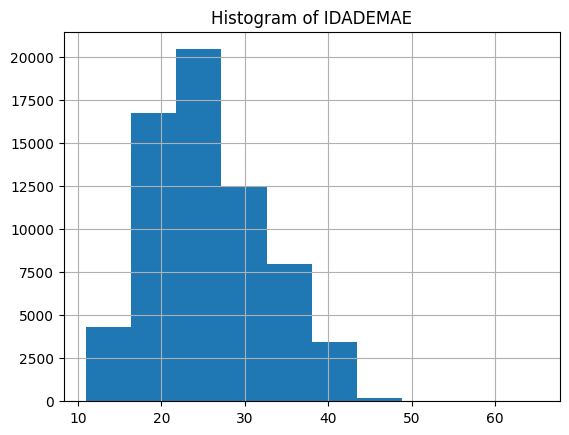

In [420]:
#Verificando a distribuição de dados na coluna idademae

df['IDADEMAE'].hist()
plt.title('Histogram of IDADEMAE')
plt.show()


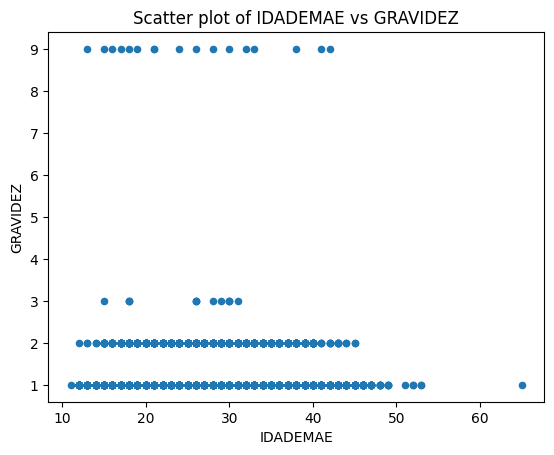

In [421]:
#Vendo a distribuição de dados entre idademae e gravidez

df.plot(kind='scatter', x='IDADEMAE', y='GRAVIDEZ')
plt.title('Scatter plot of IDADEMAE vs GRAVIDEZ')
plt.show()



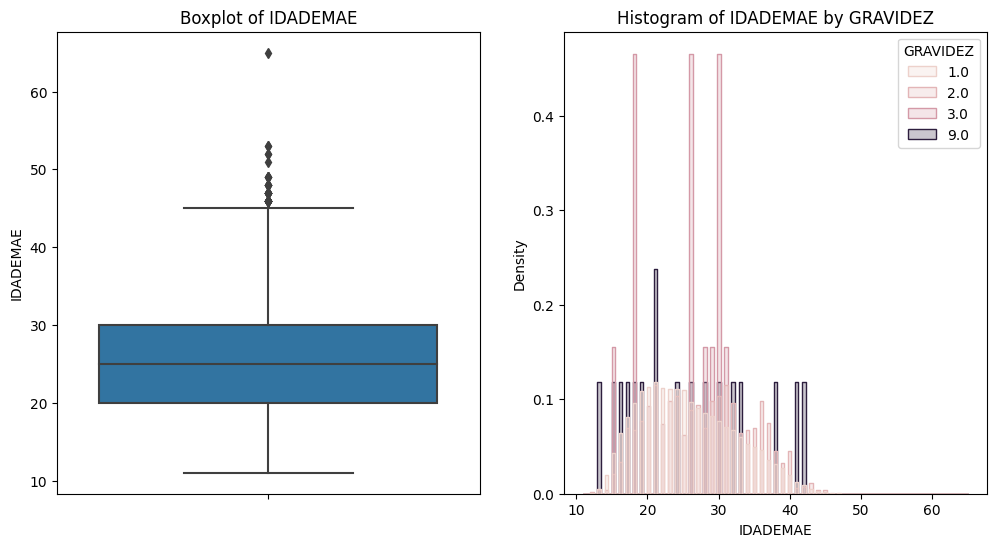

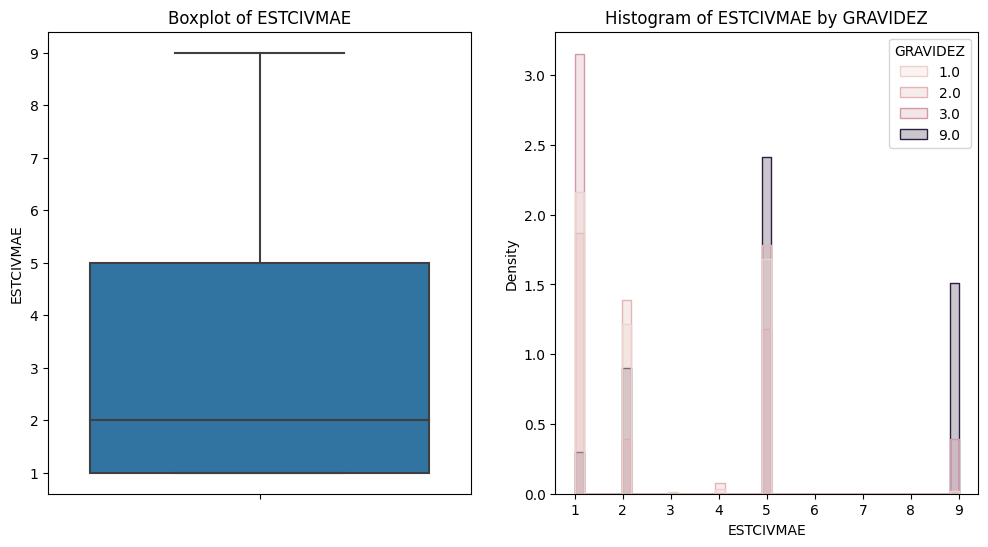

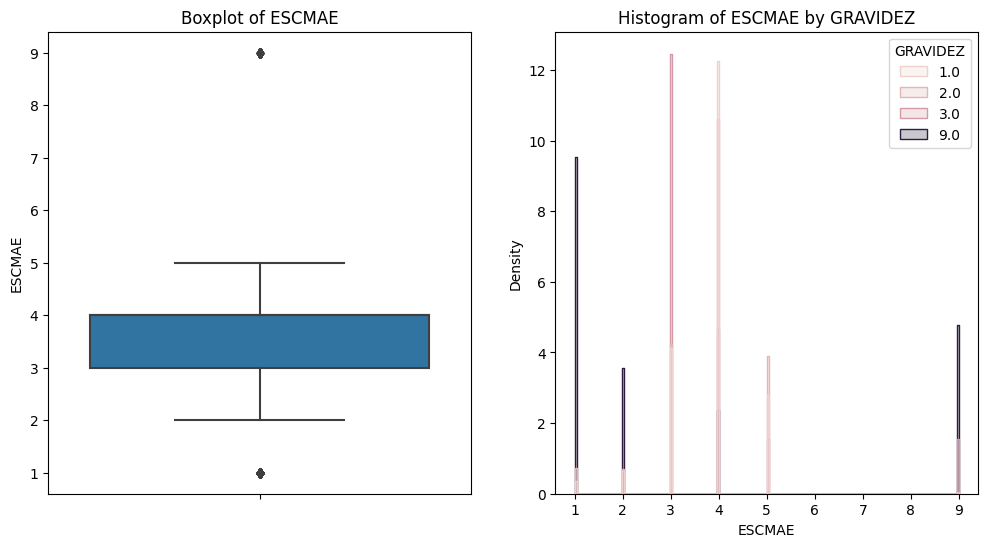

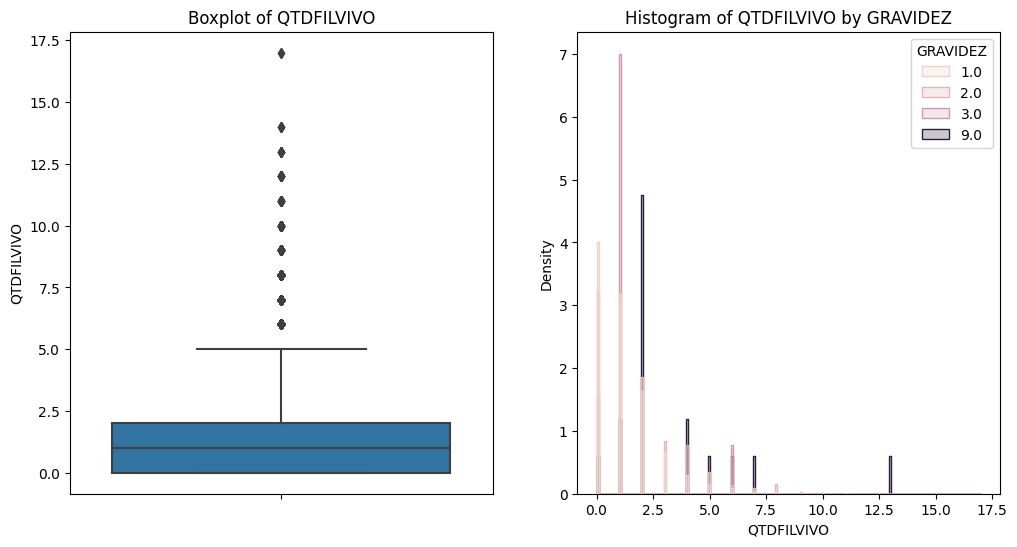

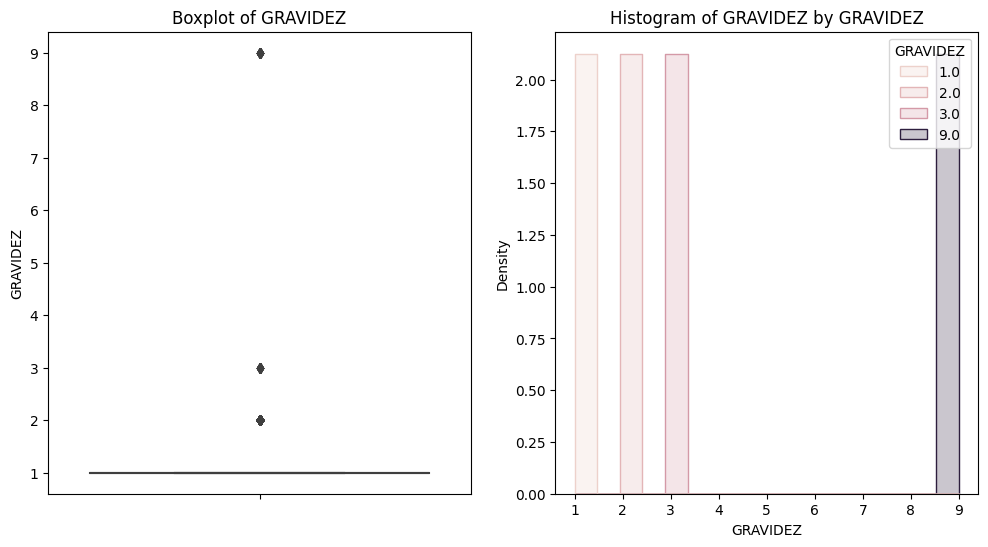

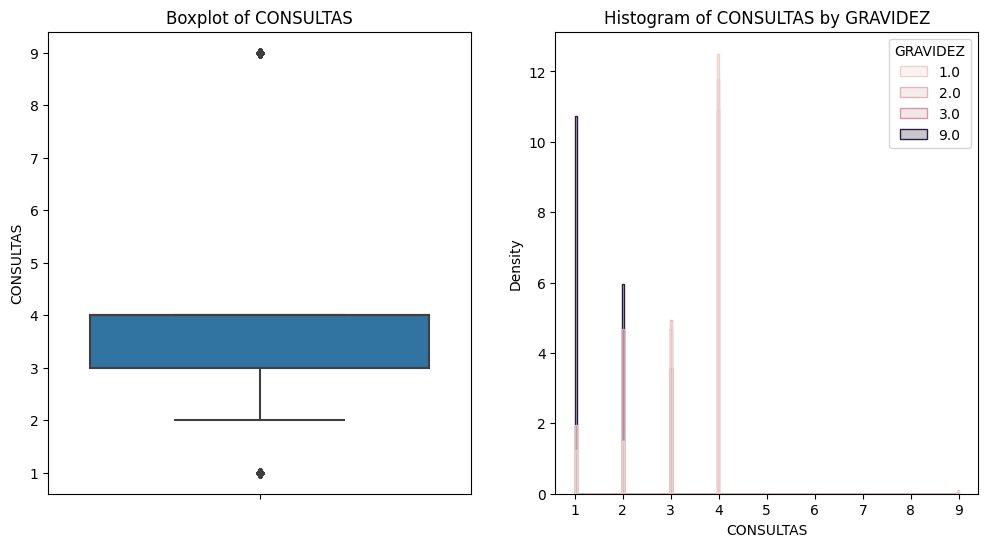

In [422]:

# Substitua 'column' pelos nomes das colunas
columns = ['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GRAVIDEZ', 'CONSULTAS']

for column in columns:
    plt.figure(figsize=(12,6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title('Boxplot of '+ column)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, hue='GRAVIDEZ', element="step", stat="density", common_norm=False)
    plt.title('Histogram of ' + column + ' by GRAVIDEZ')
    
    plt.show()


In [423]:
df.to_csv('SINASC_TRATADO.csv')

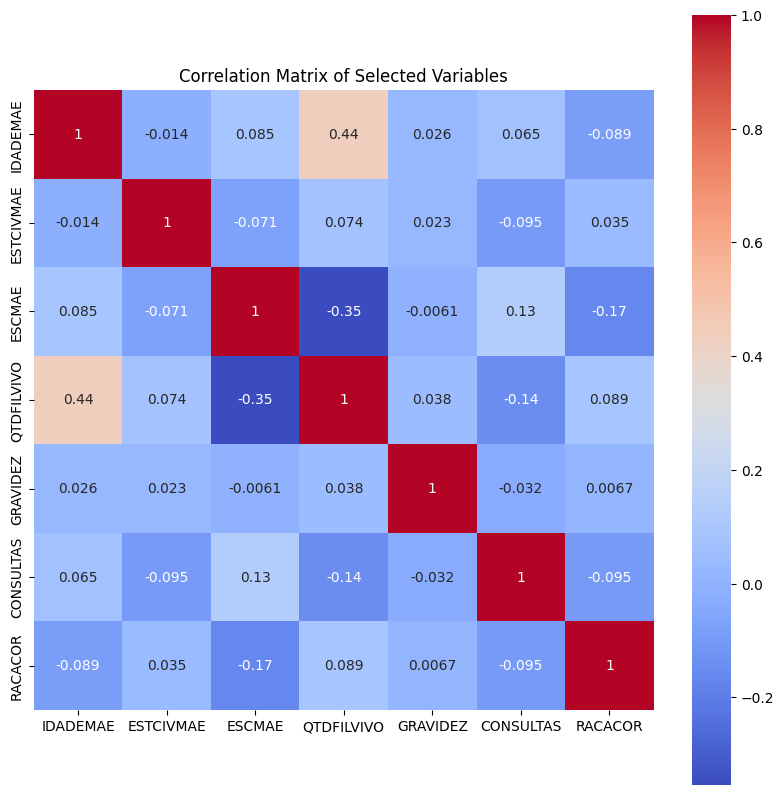

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt

# Substitua 'column' pelos nomes das colunas
columns = ['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GRAVIDEZ', 'CONSULTAS', 'RACACOR']

correlation = df[columns].corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show()


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ORIGEM              65535 non-null  int64  
 1   LOCNASC             65535 non-null  int64  
 2   IDADEMAE            65535 non-null  float64
 3   ESTCIVMAE           65535 non-null  float64
 4   ESCMAE              65535 non-null  float64
 5   QTDFILVIVO          65535 non-null  float64
 6   GRAVIDEZ            65535 non-null  float64
 7   PARTO               65535 non-null  float64
 8   CONSULTAS           65535 non-null  int64  
 9   HORANASC            65535 non-null  float64
 10  SEXO                65535 non-null  int64  
 11  APGAR1              65535 non-null  float64
 12  APGAR5              65535 non-null  float64
 13  RACACOR             65535 non-null  float64
 14  PESO                65535 non-null  float64
 15  IDANOMAL            65535 non-null  float64
 16  DIFD

In [426]:
df.describe()

,ORIGEM,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GRAVIDEZ,PARTO,CONSULTAS,HORANASC,...,DTNASCMAE_month,DTNASCMAE_day,DTNASCMAE_weekday,DTRECEBIM_year,DTRECEBIM_month,DTRECEBIM_day,DTRECEBIM_weekday,ANO_CADASTRO,MES_CADASTRO,DIA_CADASTRO
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
mean,1.000061,1.056626,25.623713,2.609049,3.824506,1.170031,1.018814,1.514092,3.445716,1302.542168,...,6.337682,17.108644,2.939315,2021.312703,6.114549,17.656275,1.944808,2021.291142,6.069306,17.457511
std,0.007812,0.431799,6.729283,1.797422,0.808282,1.452151,0.182714,0.507441,0.956437,642.809368,...,3.370747,8.053325,2.016880,0.604719,3.389221,9.155861,1.609577,0.591661,3.420039,7.913849
min,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,2009.000000,1.000000,1.000000
25%,1.000000,1.000000,20.000000,1.000000,3.000000,0.000000,1.000000,1.000000,3.000000,856.000000,...,3.000000,10.000000,1.000000,2021.000000,3.000000,9.000000,0.000000,2021.000000,3.000000,10.000000
50%,1.000000,1.000000,25.000000,2.000000,4.000000,1.000000,1.000000,2.000000,4.000000,1339.000000,...,6.000000,17.000000,3.000000,2021.000000,6.000000,17.000000,2.000000,2021.000000,6.000000,18.000000
75%,1.000000,1.000000,30.000000,5.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1817.000000,...,9.000000,24.000000,5.000000,2021.000000,9.000000,27.000000,3.000000,2021.000000,9.000000,24.000000
max,2.000000,9.000000,65.000000,9.000000,9.000000,17.000000,9.000000,9.000000,9.000000,3000.000000,...,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000


In [427]:
# removendo outlier da idademae

df = df[df['IDADEMAE'] <= 45]


In [428]:
df.describe()

,ORIGEM,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GRAVIDEZ,PARTO,CONSULTAS,HORANASC,...,DTNASCMAE_month,DTNASCMAE_day,DTNASCMAE_weekday,DTRECEBIM_year,DTRECEBIM_month,DTRECEBIM_day,DTRECEBIM_weekday,ANO_CADASTRO,MES_CADASTRO,DIA_CADASTRO
count,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,...,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000,65487.000000
mean,1.000061,1.056484,25.607464,2.608686,3.825095,1.167606,1.018828,1.514163,3.446058,1302.683128,...,6.337777,17.108296,2.939331,2021.312703,6.114206,17.655290,1.944783,2021.291096,6.069082,17.457129
std,0.007815,0.431130,6.704382,1.797477,0.807463,1.447196,0.182780,0.507444,0.956249,642.819337,...,3.370712,8.053527,2.016932,0.604760,3.388948,9.155698,1.609583,0.591682,3.419819,7.914330
min,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,2009.000000,1.000000,1.000000
25%,1.000000,1.000000,20.000000,1.000000,3.000000,0.000000,1.000000,1.000000,3.000000,856.000000,...,3.000000,10.000000,1.000000,2021.000000,3.000000,9.000000,0.000000,2021.000000,3.000000,10.000000
50%,1.000000,1.000000,25.000000,2.000000,4.000000,1.000000,1.000000,2.000000,4.000000,1339.000000,...,6.000000,17.000000,3.000000,2021.000000,6.000000,17.000000,2.000000,2021.000000,6.000000,18.000000
75%,1.000000,1.000000,30.000000,5.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1817.000000,...,9.000000,24.000000,5.000000,2021.000000,9.000000,27.000000,3.000000,2021.000000,9.000000,24.000000
max,2.000000,9.000000,45.000000,9.000000,9.000000,17.000000,9.000000,9.000000,9.000000,3000.000000,...,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000


In [429]:
df = df[df['QTDFILVIVO'] <= 5]


In [430]:
df.describe()

,ORIGEM,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GRAVIDEZ,PARTO,CONSULTAS,HORANASC,...,DTNASCMAE_month,DTNASCMAE_day,DTNASCMAE_weekday,DTRECEBIM_year,DTRECEBIM_month,DTRECEBIM_day,DTRECEBIM_weekday,ANO_CADASTRO,MES_CADASTRO,DIA_CADASTRO
count,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,...,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000,64211.000000
mean,1.000062,1.048372,25.415381,2.597686,3.849185,1.047235,1.018097,1.518198,3.457554,1303.933485,...,6.340175,17.114918,2.937332,2021.313124,6.118905,17.624114,1.943094,2021.290729,6.066577,17.458270
std,0.007893,0.394278,6.598428,1.791177,0.780939,1.159750,0.174221,0.506606,0.948175,642.212370,...,3.369778,8.056282,2.016973,0.605796,3.392442,9.145131,1.609939,0.592360,3.422792,7.908475
min,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,2009.000000,1.000000,1.000000
25%,1.000000,1.000000,20.000000,1.000000,4.000000,0.000000,1.000000,1.000000,3.000000,858.000000,...,3.000000,10.000000,1.000000,2021.000000,3.000000,9.000000,0.000000,2021.000000,3.000000,10.000000
50%,1.000000,1.000000,25.000000,2.000000,4.000000,1.000000,1.000000,2.000000,4.000000,1340.000000,...,6.000000,17.000000,3.000000,2021.000000,6.000000,17.000000,2.000000,2021.000000,6.000000,18.000000
75%,1.000000,1.000000,30.000000,5.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1817.000000,...,9.000000,24.000000,5.000000,2021.000000,9.000000,26.000000,3.000000,2021.000000,9.000000,24.000000
max,2.000000,9.000000,45.000000,9.000000,9.000000,5.000000,9.000000,9.000000,9.000000,3000.000000,...,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000,6.000000,2023.000000,12.000000,31.000000


In [431]:
# Salvando o arquivo em csv
df.to_csv('SINASC_TRATADO.csv')

In [432]:
#Criando a variavel target
df['GRAVIDEZ_MENOR_20'] = (df['IDADEMAE'] < 20).astype(int)


In [433]:

# Dividir os dados
X = df.drop(columns=['GRAVIDEZ_MENOR_20'])

In [434]:
#armazenando a variavel target em y
y = df['GRAVIDEZ_MENOR_20']

In [435]:

# Crie o scaler e ajuste nos dados de treinamento
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [436]:
# Transforme os conjuntos de treinamento e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [437]:
# Crie o classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)  # você pode ajustar o número de vizinhos


In [438]:
# Treine o modelo
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [439]:
# Faça as previsões no conjunto de teste
y_pred = knn.predict(X_test_scaled)

In [440]:
# Calcule a acurácia no conjunto de treinamento e teste
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

In [441]:
# printando na tela o desempenho do modelo

print("Score do conjunto de treinamento: ", train_score)
print("Score do conjunto de teste: ", test_score)

Score do conjunto de treinamento:  0.9284379380158854
Score do conjunto de teste:  0.8705131199875419


In [442]:

# Validação cruzada
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("Scores da validação cruzada: ", cv_scores)
print("Média dos scores: ", np.mean(cv_scores))

Scores da validação cruzada:  [0.85838038 0.85789371 0.86159237 0.86362309 0.85875596]
Média dos scores:  0.8600491021812708
